<h1>Tarea 1 Base de datos III</h1>


<li>imports y configuración:</li>


In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

<h3>Dataset escogido: Pokémon</h3>
<h5>Descripción: cada pokémon tiene:</h5>
<li>Name: Nombre de cada pokémon</li>
<li>Type 1: Cada pokémon tiene un tipo, este determina su debilidad/resistencia a los ataques.</li>
<li>Type 2: Algunos pokémon tienen doble tipo </li>
<li>Total: La suma total de las estadisticas, un punto referencial de cuan fuerte es el pokémon.</li>
<li>HP: Puntos de vida, define cuanto daño puede soportar un pokémon antes de debilitarse.</li>
<li>Attack: El modificador basico para los ataques normales(ej: arañazo, golpe)</li>
<li>Defense: La resistencia base contra ataques normales.</li>
<li>SP Atk: Ataque especial, el modificador basico para los ataques especiales.(ej: llamarada, rayo burbuja)</li>
<li>SP Def: La resistencia basica contra los ataques especiales.</li>
<li>Speed: Determina que pokémon ataca primero en cada turno.</li>

<h5>Este dataset contiene 13 columnas y 1058 filas</h5>


In [ ]:
#ingresar link para cargar el dataframe

datos= pd.read_csv('/content/drive/MyDrive/Pokemon.csv',sep=',')#carga dataset desde drive
datos

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,902,Basculegion,Water,Ghost,530,120,112,65,80,75,78,8,False
1054,903,Sneasler,Poison,Fighting,510,80,130,60,40,80,120,8,False
1055,904,Overqwil,Dark,Poison,510,85,115,95,65,65,85,8,False
1056,905,EnamorusIncarnate Form,Fairy,Flying,580,74,115,70,135,80,106,8,True


<li>Las columnas #, Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed y Generation son datos de tipo Int64(entero de 64 bits).</li>

<li>Las columnas Name, Type 1, Type 2, Son datos de tipo String, con la columna Type 2 considerando valores NaN.</li>

<li>La Columna Legendary contiene valores de tipo booleanos. </li>


# <h1>Análisis Univariado</h1>

<h3>Para realizar este apartado se utilizaron las variables de Attack y Sp. Atk.</h3>

<h3>Datos de tendencia central</h3>
<li>Promedio</li>

In [ ]:
#Se calcula el promedio de las variables escojidas
PromedioAtk = datos['Attack'].mean()
PromedioSpAtk = datos['Sp. Atk'].mean()
print('El promedio de ataque de los pokémon es:',PromedioAtk,'\nEl promedio de ataque especial de los pokémon es:',PromedioSpAtk)

El promedio de ataque de los pokémon es: 80.73818525519849 
El promedio de ataque especial de los pokémon es: 73.02079395085066


<h3>Gráfica del promedio de Ataque</h3>

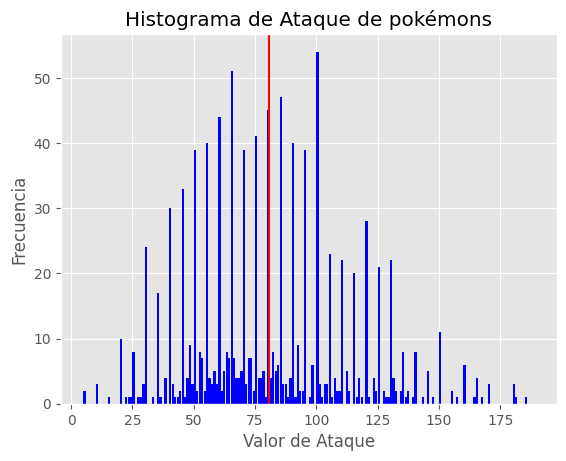

In [ ]:
#grafica del promedio de Ataque
intervalos = range(int(datos['Attack'].min()), int(datos['Attack'].max()))

plt.hist(x=datos['Attack'], bins=intervalos, color='#0000FF', rwidth=0.9)
plt.title('Histograma de Ataque de pokémons')
plt.ylabel('Frecuencia')
plt.xlabel('Valor de Ataque')
plt.axvline(PromedioAtk, color='red')

plt.show() #dibujamos el histograma

<h3>Gráfico Promedio de Ataque especial</h3>

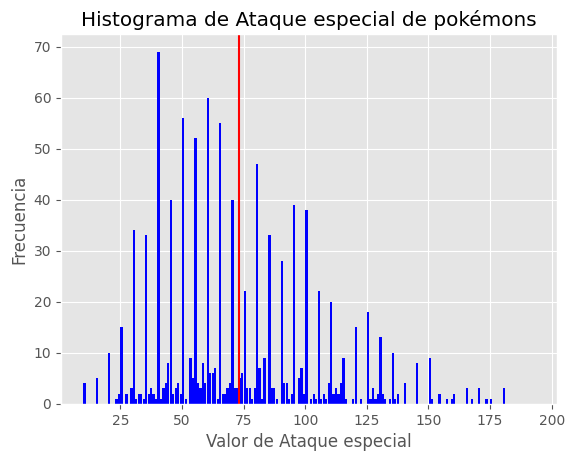

In [ ]:
intervalos = range(int(datos['Sp. Atk'].min()), int(datos['Sp. Atk'].max()))

plt.hist(x=datos['Sp. Atk'], bins=intervalos, color='#0000FF', rwidth=0.9)
plt.title('Histograma de Ataque especial de pokémons')
plt.ylabel('Frecuencia')
plt.xlabel('Valor de Ataque especial')
plt.axvline(PromedioSpAtk, color='red')

plt.show() #dibujamos el histograma

<li>Mediana</li>

In [ ]:
Ataque = datos.sort_values('Attack')
SpAtk= datos.sort_values('Sp. Atk')
mediaAtk=Ataque['Attack'].median()
mediaSpAtk=Ataque['Sp. Atk'].median()
print('La mediana de ataque de los pokémon es:',mediaAtk,'\nLa mediana de ataque especial de los pokémon es:',mediaSpAtk)

La mediana de ataque de los pokémon es: 79.5 
La mediana de ataque especial de los pokémon es: 65.0


<h3>Gráfico de la mediana del ataque</h3>

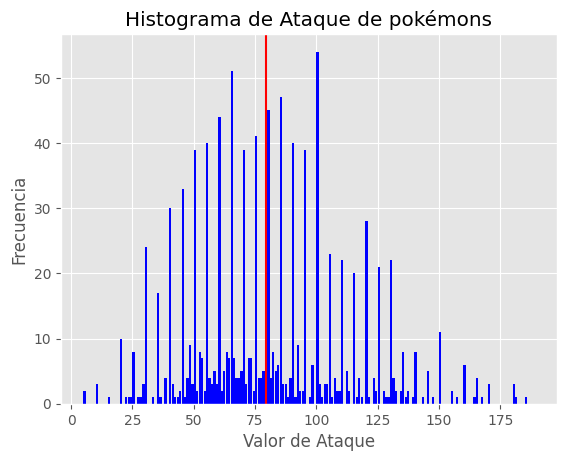

In [ ]:
#se grafica la mediana del ataque
intervalos = range(int(datos['Attack'].min()), int(datos['Attack'].max()))

plt.hist(x=datos['Attack'], bins=intervalos, color='#0000FF', rwidth=0.9)
plt.title('Histograma de Ataque de pokémons')
plt.ylabel('Frecuencia')
plt.xlabel('Valor de Ataque')
plt.axvline(mediaAtk, color='red')
plt.show() #dibujamos el histograma


<h3>Gráfico de la mediana del ataque especial</h3>

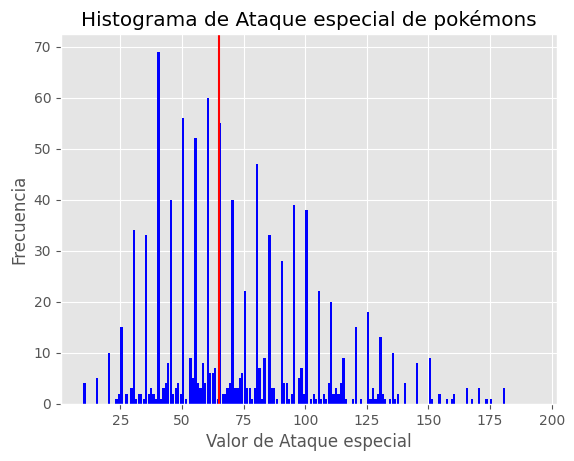

In [ ]:
#se grafica la mediana del ataque especial
intervalos = range(int(datos['Sp. Atk'].min()), int(datos['Sp. Atk'].max()))

plt.hist(x=datos['Sp. Atk'], bins=intervalos, color='#0000FF', rwidth=0.9)
plt.title('Histograma de Ataque especial de pokémons')
plt.ylabel('Frecuencia')
plt.xlabel('Valor de Ataque especial')
plt.axvline(mediaSpAtk, color='red')
plt.show() #dibujamos el histograma


<li>Moda</li>

In [ ]:
modaAtk = pd.Series(datos['Attack'].values.flatten()).mode()[0]
modaSpAtk = pd.Series(datos['Sp. Atk'].values.flatten()).mode()[0]
print('La moda de ataque de los pokémon es:',modaAtk,'\nLa moda de ataque especial de los pokémon es:',modaSpAtk)

La moda de ataque de los pokémon es: 100 
La moda de ataque especial de los pokémon es: 40


<h3>Gráfico de la moda del ataque</h3>

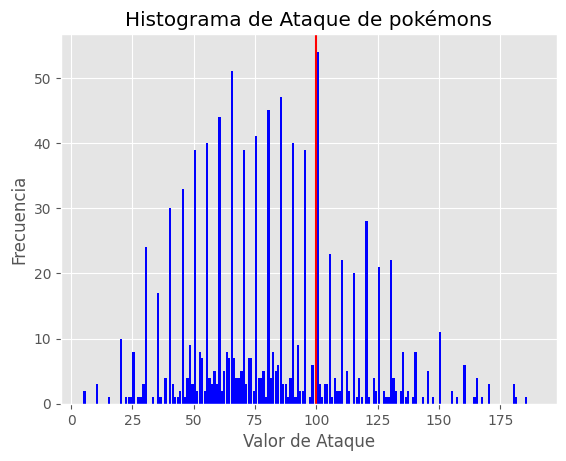

In [ ]:
#se grafica la moda del ataque
intervalos = range(int(datos['Attack'].min()), int(datos['Attack'].max()))
plt.hist(x=datos['Attack'], bins=intervalos, color='#0000FF', rwidth=0.9)
plt.title('Histograma de Ataque de pokémons')
plt.ylabel('Frecuencia')
plt.xlabel('Valor de Ataque')
plt.axvline(modaAtk, color='red')
plt.show() #dibujamos el histograma

<h3>Gráfico de la moda del ataque especial</h3>

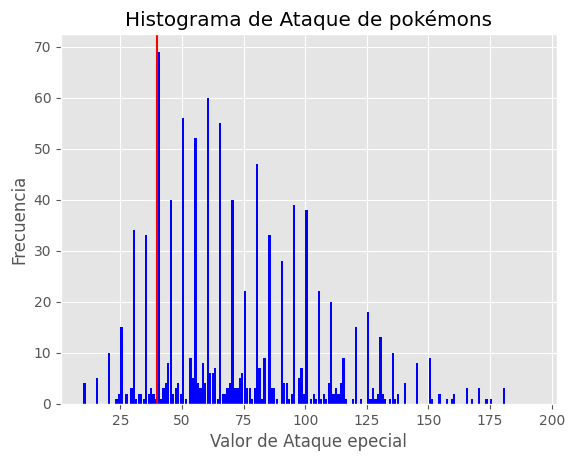

In [ ]:
#se grafica la moda del ataque especial
intervalos = range(int(datos['Sp. Atk'].min()), int(datos['Sp. Atk'].max()))
plt.hist(x=datos['Sp. Atk'], bins=intervalos, color='#0000FF', rwidth=0.9)
plt.title('Histograma de Ataque de pokémons')
plt.ylabel('Frecuencia')
plt.xlabel('Valor de Ataque epecial')
plt.axvline(modaSpAtk, color='red')
plt.show() #dibujamos el histograma

<h3>Medidas de disperción</h3>
<li>varianza del ataque</li>

In [ ]:
varAtk=datos['Attack'].var()
varSpAtk=datos['Sp. Atk'].var()
print('La varianza de ataque de los pokémon es:',varAtk,'\nLa varianza de ataque especial de los pokémon es:',varSpAtk)

La varianza de ataque de los pokémon es: 1050.9086824178712 
La varianza de ataque especial de los pokémon es: 1067.1197185743436


<h3>Gráfico de la varianza de Ataque</h3>

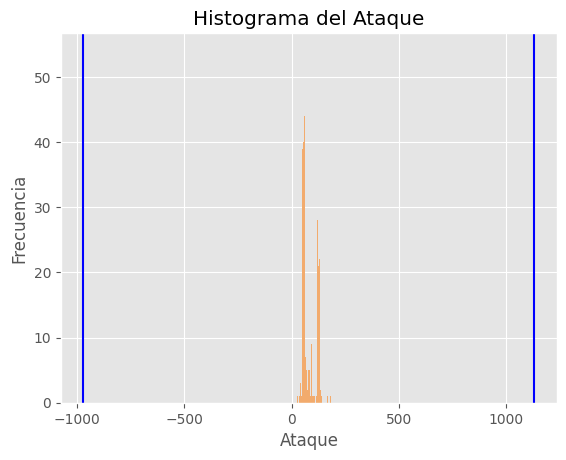

In [ ]:
# Grafico varianza del ataque
intervalos = range(int(datos['Attack'].min()), int(datos['Attack'].max())) #calculamos los extremos de los intervalos

plt.hist(x=datos['Attack'], bins=intervalos, color='#F2AB6D', rwidth=0.85)
plt.title('Histograma del Ataque')
plt.ylabel('Frecuencia')
plt.xlabel('Ataque')

plt.axvline( datos['Attack'].mean() + datos['Attack'].var(), color='blue')
plt.axvline( datos['Attack'].mean()  - datos['Attack'].var(), color='blue')
plt.show()

<h3>Gráfico de la varianza de Ataque especial</h3>

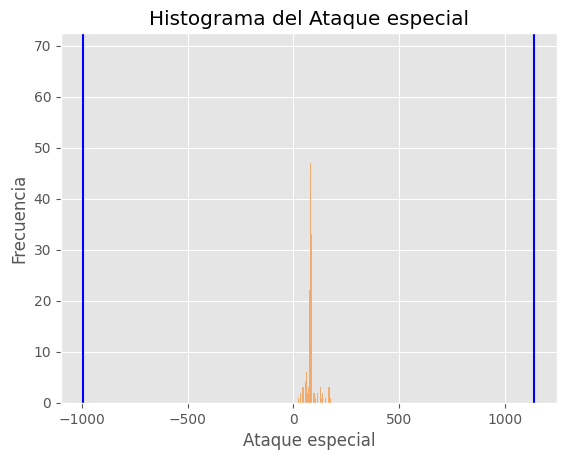

In [ ]:
# Grafico varianza del ataque especial
intervalos = range(int(datos['Sp. Atk'].min()), int(datos['Sp. Atk'].max())) #calculamos los extremos de los intervalos

plt.hist(x=datos['Sp. Atk'], bins=intervalos, color='#F2AB6D', rwidth=0.85)
plt.title('Histograma del Ataque especial')
plt.ylabel('Frecuencia')
plt.xlabel('Ataque especial')

plt.axvline( datos['Sp. Atk'].mean() + datos['Sp. Atk'].var(), color='blue')
plt.axvline( datos['Sp. Atk'].mean() - datos['Sp. Atk'].var(), color='blue')
plt.show()

<li>Desviación estándar</li>





In [ ]:
sdAtk = np.std(datos['Attack'])
sdSpAtk = np.std(datos['Attack'])
print('La desviación estandar de ataque de los pokémon es:',sdAtk,'\nLa desviación estandar de ataque especial de los pokémon es:',sdSpAtk)

La desviación estandar de ataque de los pokémon es: 32.402397827729885 
La desviación estandar de ataque especial de los pokémon es: 32.402397827729885


<h3>Gráfico de la desviación estandar de Ataque</h3>

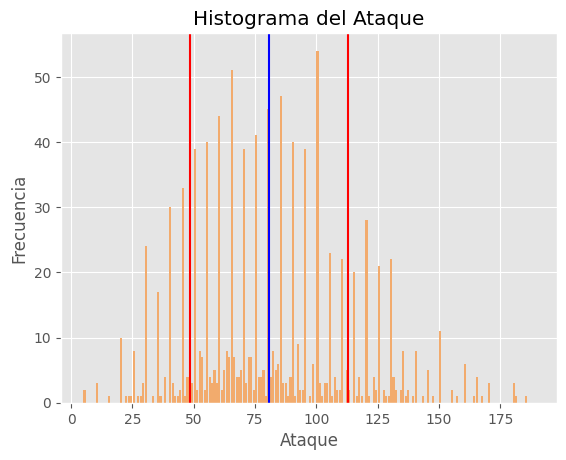

In [ ]:
# Grafico desviacion estandar del ataque
intervalos = range(int(datos['Attack'].min()), int(datos['Attack'].max())) #calculamos los extremos de los intervalos

plt.hist(x=datos['Attack'], bins=intervalos, color='#F2AB6D', rwidth=0.85)
plt.title('Histograma del Ataque')
plt.ylabel('Frecuencia')
plt.xlabel('Ataque')

plt.axvline( PromedioAtk, color='blue')

plt.axvline( PromedioAtk-sdAtk, color='red')
plt.axvline( PromedioAtk+sdAtk, color='red')
plt.show()

<h3>Gráfico de la desviación estandar de Ataque especial</h3>

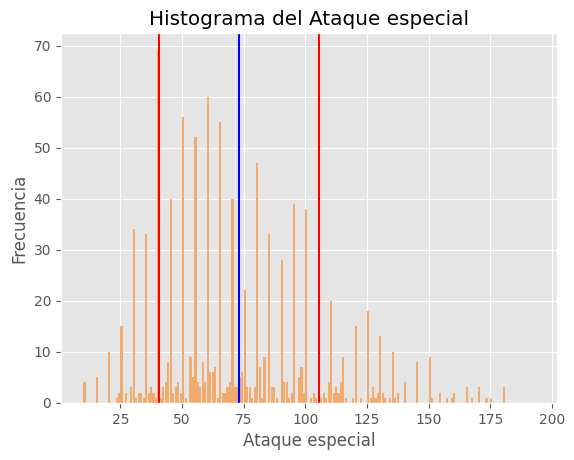

In [ ]:
# Grafico desviacion estandar del ataque especial
intervalos = range(int(datos['Sp. Atk'].min()), int(datos['Sp. Atk'].max())) #calculamos los extremos de los intervalos

plt.hist(x=datos['Sp. Atk'], bins=intervalos, color='#F2AB6D', rwidth=0.85)
plt.title('Histograma del Ataque especial')
plt.ylabel('Frecuencia')
plt.xlabel('Ataque especial')

plt.axvline( PromedioSpAtk, color='blue')

plt.axvline( PromedioSpAtk-sdSpAtk, color='red')
plt.axvline( PromedioSpAtk+sdSpAtk, color='red')
plt.show()

**Percentiles Attack**

In [ ]:
# Percentiles Attack
percentiles = [i/100 for i in range (0, 101)]
datos['Attack'].quantile(percentiles, interpolation='lower')

0.00      5
0.01     20
0.02     25
0.03     29
0.04     30
       ... 
0.96    140
0.97    150
0.98    155
0.99    165
1.00    190
Name: Attack, Length: 101, dtype: int64

In [ ]:
# Deciles Attack
deciles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1]
datos['Attack'].quantile(deciles, interpolation='lower')

0.1     40
0.2     52
0.3     60
0.4     70
0.5     79
0.6     85
0.7     95
0.8    107
0.9    125
1.0    190
Name: Attack, dtype: int64

In [ ]:
# Cuartiles Attack
cuartiles = [0, 0.25, 0.5, 0.75, 1]
datos['Attack'].quantile(cuartiles, interpolation='lower')

0.00      5
0.25     56
0.50     79
0.75    100
1.00    190
Name: Attack, dtype: int64

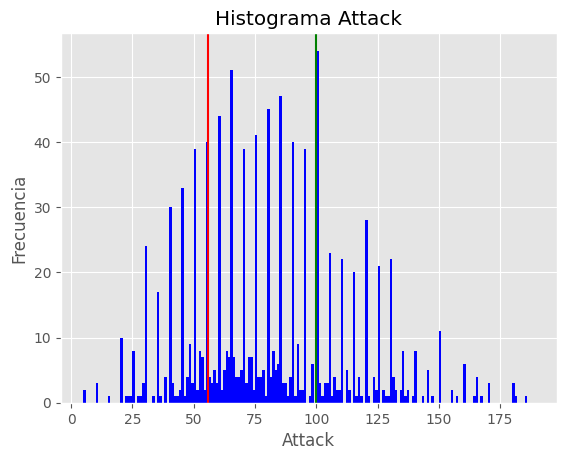

In [ ]:
# Grafico percentil 25 y 75 Attack
intervalos = range(int(datos['Attack'].min()), int(datos['Attack'].max()))
plt.hist(x=datos['Attack'], bins=intervalos, color='#0000FF')
plt.title('Histograma Attack')
plt.xlabel('Attack')
plt.ylabel('Frecuencia')
plt.axvline((datos['Attack'].quantile(0.25, interpolation='lower')), color='red')
plt.axvline((datos['Attack'].quantile(0.75, interpolation='lower')), color='green')
plt.show()

**Percentil Special Attack**

In [ ]:
# Percentiles Special Attack
percentiles = [i/100 for i in range (0, 101)]
datos['Sp. Atk'].quantile(percentiles, interpolation='lower')

0.00     10
0.01     20
0.02     24
0.03     25
0.04     30
       ... 
0.96    136
0.97    145
0.98    150
0.99    165
1.00    194
Name: Sp. Atk, Length: 101, dtype: int64

In [ ]:
# Deciles Special Attack
deciles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1]
datos['Sp. Atk'].quantile(deciles, interpolation='lower')

0.1     35
0.2     45
0.3     53
0.4     60
0.5     65
0.6     79
0.7     88
0.8    100
0.9    120
1.0    194
Name: Sp. Atk, dtype: int64

In [ ]:
# Cuartiles Special Attack
cuartiles = [0, 0.25, 0.5, 0.75, 1]
datos['Sp. Atk'].quantile(cuartiles, interpolation='lower')

0.00     10
0.25     50
0.50     65
0.75     95
1.00    194
Name: Sp. Atk, dtype: int64

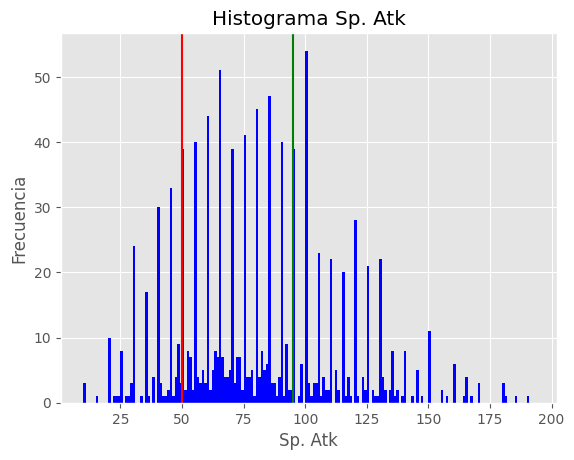

In [ ]:
# Grafico percentil 25 y 75 Special Attack
intervalos = range(int(datos['Sp. Atk'].min()), int(datos['Sp. Atk'].max()))
plt.hist(x=datos['Attack'], bins=intervalos, color='#0000FF')
plt.title('Histograma Sp. Atk')
plt.xlabel('Sp. Atk')
plt.ylabel('Frecuencia')
plt.axvline((datos['Sp. Atk'].quantile(0.25, interpolation='lower')), color='red')
plt.axvline((datos['Sp. Atk'].quantile(0.75, interpolation='lower')), color='green')
plt.show()

<h1>Análisis NaN</h1>

<h3>Se verifica cuántas celdas contienen datos NaN</h3>

In [ ]:
#cantidad de celdas que contienen datos NaN
datosNull=datos.isnull().sum().sum()
print('La cantidad de datos nulos en el dataset es:',datosNull)

La cantidad de datos nulos en el dataset es: 485


<h3>Se crea un nuevo conjunto de datos donde se eliminaron las filas con datos nulos</h3>

In [ ]:
#Nuevo conjunto de datos
nuevo = datos.dropna(how='any')
nuevo

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,902,Basculegion,Water,Ghost,530,120,112,65,80,75,78,8,False
1054,903,Sneasler,Poison,Fighting,510,80,130,60,40,80,120,8,False
1055,904,Overqwil,Dark,Poison,510,85,115,95,65,65,85,8,False
1056,905,EnamorusIncarnate Form,Fairy,Flying,580,74,115,70,135,80,106,8,True


<h3>Se verifica que no queden datos NaN</h3>

In [ ]:
datNull=nuevo.isnull().sum().sum()
print('La cantidad de datos nulos en el dataset es:',datNull)

La cantidad de datos nulos en el dataset es: 0


<h3>Medidas de tendencia central del nuevo dataset</h3>

<li>Promedio</li>

In [ ]:
#Se calcula el promedio de las variables escojidas con los nuevos datos
PromedioAtk = nuevo['Attack'].mean()
PromedioSpAtk = nuevo['Sp. Atk'].mean()
print('El promedio de ataque de los pokémon es:',PromedioAtk,'\nEl promedio de ataque especial de los pokémon es:',PromedioSpAtk)

El promedio de ataque de los pokémon es: 85.15183246073299 
El promedio de ataque especial de los pokémon es: 77.89005235602095


<h3>Gráfica del promedio de Ataque</h3>

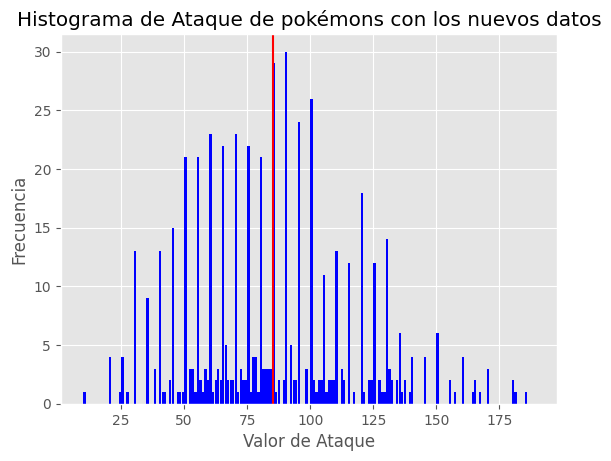

In [ ]:
#grafica del promedio de Ataque con los nuevos datos
intervalos = range(int(nuevo['Attack'].min()), int(nuevo['Attack'].max()))

plt.hist(x=nuevo['Attack'], bins=intervalos, color='#0000FF', rwidth=0.9)
plt.title('Histograma de Ataque de pokémons con los nuevos datos')
plt.ylabel('Frecuencia')
plt.xlabel('Valor de Ataque')
plt.axvline(PromedioAtk, color='red')

plt.show() #dibujamos el histograma

<h3>Gráfico Promedio de Ataque especial</h3>

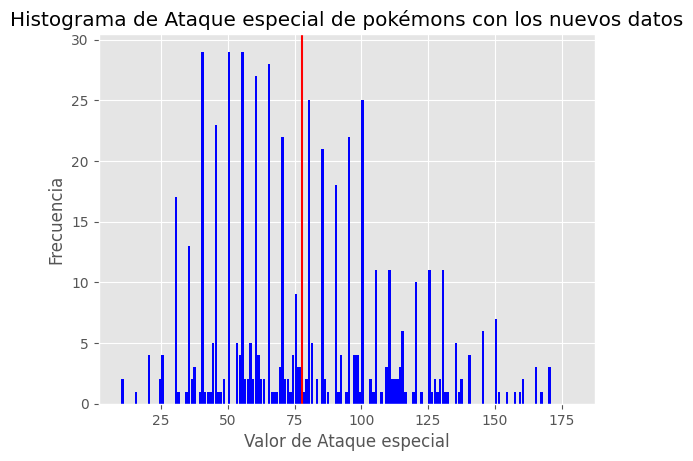

In [ ]:
# se calcula el promedio con los nuevos datos
intervalos = range(int(nuevo['Sp. Atk'].min()), int(nuevo['Sp. Atk'].max()))

plt.hist(x=nuevo['Sp. Atk'], bins=intervalos, color='#0000FF', rwidth=0.9)
plt.title('Histograma de Ataque especial de pokémons con los nuevos datos')
plt.ylabel('Frecuencia')
plt.xlabel('Valor de Ataque especial')
plt.axvline(PromedioSpAtk, color='red')

plt.show() #dibujamos el histograma

<li>Mediana</li>

In [ ]:
#mediana con los nuevos datos
Ataque = nuevo.sort_values('Attack')
SpAtk= nuevo.sort_values('Sp. Atk')
mediaAtk=Ataque['Attack'].median()
mediaSpAtk=Ataque['Sp. Atk'].median()
print('La mediana de ataque de los pokémon es:',mediaAtk,'\nLa mediana de ataque especial de los pokémon es:',mediaSpAtk)

La mediana de ataque de los pokémon es: 84.0 
La mediana de ataque especial de los pokémon es: 72.0


<h3>Gráfico de la mediana del ataque</h3>

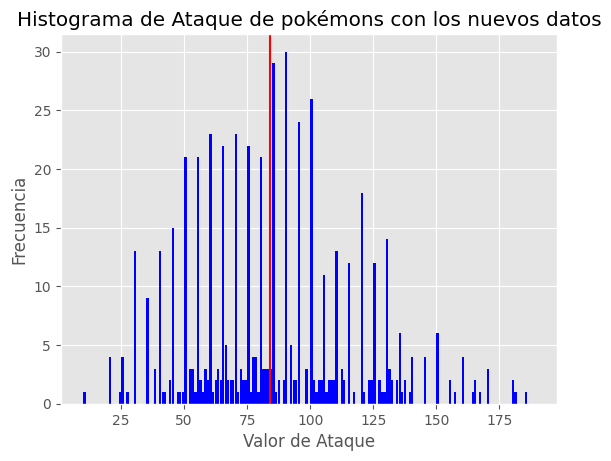

In [ ]:
#se grafica la mediana del ataque con los nuevos datos
intervalos = range(int(nuevo['Attack'].min()), int(nuevo['Attack'].max()))

plt.hist(x=nuevo['Attack'], bins=intervalos, color='#0000FF', rwidth=0.9)
plt.title('Histograma de Ataque de pokémons con los nuevos datos')
plt.ylabel('Frecuencia')
plt.xlabel('Valor de Ataque')
plt.axvline(mediaAtk, color='red')
plt.show() #dibujamos el histograma


<h3>Gráfico de la mediana del ataque especial</h3>

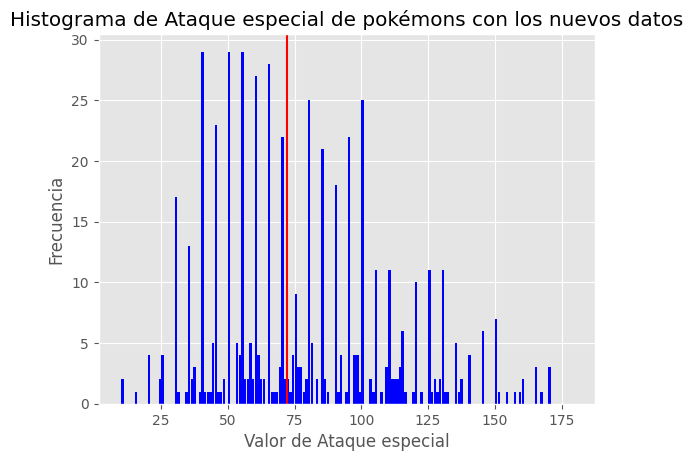

In [ ]:
#se grafica la mediana del ataque especial con los nuevos datos
intervalos = range(int(nuevo['Sp. Atk'].min()), int(nuevo['Sp. Atk'].max()))
plt.hist(x=nuevo['Sp. Atk'], bins=intervalos, color='#0000FF', rwidth=0.9)
plt.title('Histograma de Ataque especial de pokémons con los nuevos datos')
plt.ylabel('Frecuencia')
plt.xlabel('Valor de Ataque especial')
plt.axvline(mediaSpAtk, color='red')
plt.show() #dibujamos el histograma

<li>Moda</li>

In [ ]:
#se calcula la moda con los nuevos datos
modaAtk = pd.Series(nuevo['Attack'].values.flatten()).mode()[0]
modaSpAtk = pd.Series(nuevo['Sp. Atk'].values.flatten()).mode()[0]
print('La moda de ataque de los pokémon es:',modaAtk,'\nLa moda de ataque especial de los pokémon es:',modaSpAtk)

La moda de ataque de los pokémon es: 90 
La moda de ataque especial de los pokémon es: 40


# <h3>Gráfico de la moda del ataque</h3>

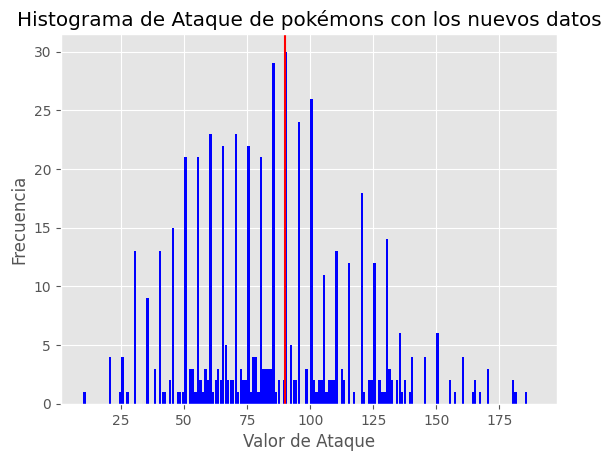

In [ ]:
#se grafica la moda del ataque con los nuevos datos
intervalos = range(int(nuevo['Attack'].min()), int(nuevo['Attack'].max()))
plt.hist(x=nuevo['Attack'], bins=intervalos, color='#0000FF', rwidth=0.9)
plt.title('Histograma de Ataque de pokémons con los nuevos datos')
plt.ylabel('Frecuencia')
plt.xlabel('Valor de Ataque')
plt.axvline(modaAtk, color='red')
plt.show() #dibujamos el histograma

<h3>Gráfico de la moda del ataque especial</h3>

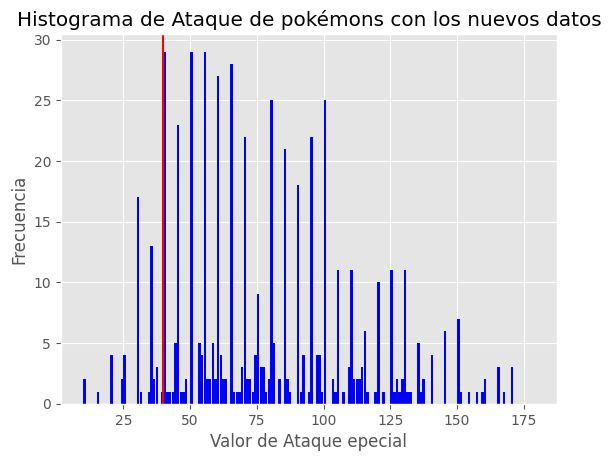

In [ ]:
#se grafica la moda del ataque especial con los nuevos datos
intervalos = range(int(nuevo['Sp. Atk'].min()), int(nuevo['Sp. Atk'].max()))
plt.hist(x=nuevo['Sp. Atk'], bins=intervalos, color='#0000FF', rwidth=0.9)
plt.title('Histograma de Ataque de pokémons con los nuevos datos')
plt.ylabel('Frecuencia')
plt.xlabel('Valor de Ataque epecial')
plt.axvline(modaSpAtk, color='red')
plt.show() #dibujamos el histograma

Medidas de dispersión

<li>Varianza</li>


In [ ]:
varAtk=nuevo['Attack'].var()
varSpAtk=nuevo['Sp. Atk'].var()
print('La varianza de ataque con los nuevos datos de los pokémon es:',varAtk,'\nLa varianza de ataque especial con los nuevos datos de los pokémon es:',varSpAtk)

La varianza de ataque con los nuevos datos de los pokémon es: 1096.3492842236299 
La varianza de ataque especial con los nuevos datos de los pokémon es: 1127.5875407315198


<h3>Gráfico de la varianza de Ataque</h3>

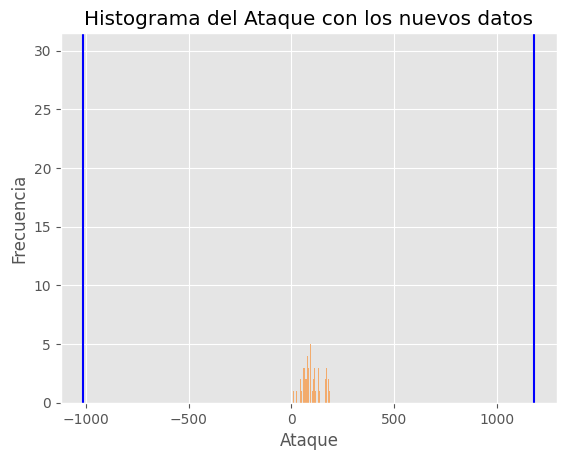

In [ ]:
# Grafico varianza del ataque con los nuevos datos
intervalos = range(int(nuevo['Attack'].min()), int(nuevo['Attack'].max())) #calculamos los extremos de los intervalos

plt.hist(x=nuevo['Attack'], bins=intervalos, color='#F2AB6D', rwidth=0.85)
plt.title('Histograma del Ataque con los nuevos datos')
plt.ylabel('Frecuencia')
plt.xlabel('Ataque')

plt.axvline( nuevo['Attack'].mean() + nuevo['Attack'].var(), color='blue')
plt.axvline( nuevo['Attack'].mean() - nuevo['Attack'].var(), color='blue')
plt.show()

# <h3>Gráfico de la varianza de Ataque especial</h3>

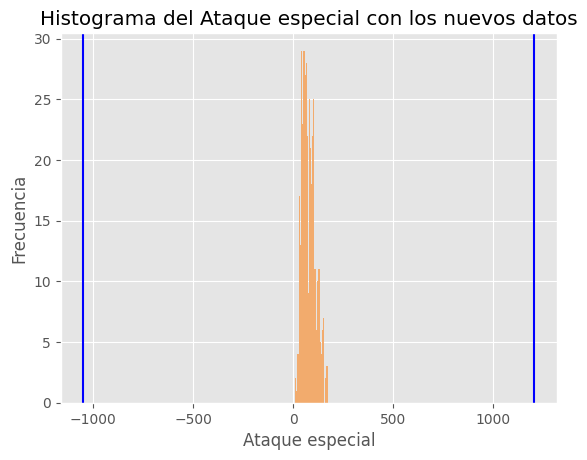

In [ ]:
# Grafico varianza del ataque especial con los nuevos datos
intervalos = range(int(nuevo['Sp. Atk'].min()), int(nuevo['Sp. Atk'].max())) #calculamos los extremos de los intervalos

plt.hist(x=nuevo['Sp. Atk'], bins=intervalos, color='#F2AB6D', rwidth=0.85)
plt.title('Histograma del Ataque especial con los nuevos datos')
plt.ylabel('Frecuencia')
plt.xlabel('Ataque especial')

plt.axvline( nuevo['Sp. Atk'].mean() + nuevo['Sp. Atk'].var(), color='blue')
plt.axvline( nuevo['Sp. Atk'].mean() - nuevo['Sp. Atk'].var(), color='blue')
plt.show()

<li>desviacion estandar</li>





In [ ]:
sdAtk = np.std(nuevo['Attack'])
sdSpAtk = np.std(nuevo['Attack'])
print('La desviación estandar de ataque con los nuevos datos de los pokémon es:',sdAtk,'\nLa desviación estandar de ataque especial con los nuevos datos de los pokémon es:',sdSpAtk)

La desviación estandar de ataque con los nuevos datos de los pokémon es: 33.08226012060638 
La desviación estandar de ataque especial con los nuevos datos de los pokémon es: 33.08226012060638


<h3>Gráfico de la desviación estandar de Ataque</h3>

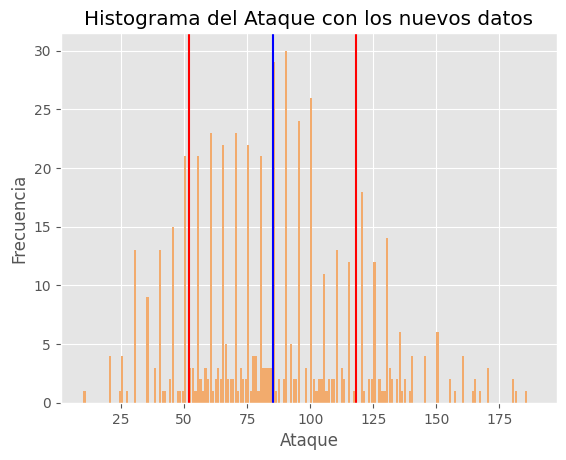

In [ ]:
# Grafico desviacion estandar del ataque con los nuevos datos
intervalos = range(int(nuevo['Attack'].min()), int(nuevo['Attack'].max())) #calculamos los extremos de los intervalos

plt.hist(x=nuevo['Attack'], bins=intervalos, color='#F2AB6D', rwidth=0.85)
plt.title('Histograma del Ataque con los nuevos datos')
plt.ylabel('Frecuencia')
plt.xlabel('Ataque')

plt.axvline( PromedioAtk, color='blue')

plt.axvline( PromedioAtk-sdAtk, color='red')
plt.axvline( PromedioAtk+sdAtk, color='red')
plt.show()

<h3>Gráfico de la desviación estandar de Ataque especial</h3>

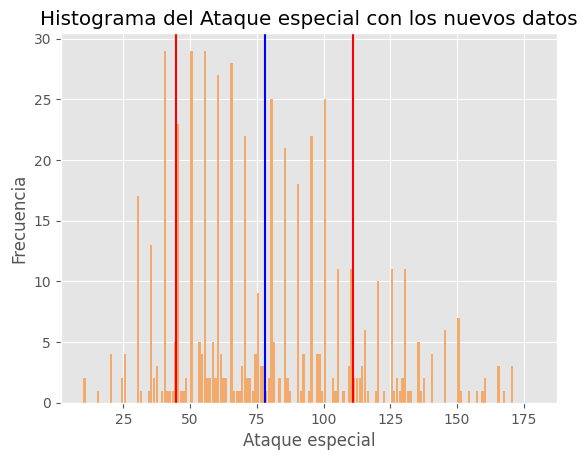

In [ ]:
# Grafico desviacion estandar del ataque especial con los nuevos datos
intervalos = range(int(nuevo['Sp. Atk'].min()), int(nuevo['Sp. Atk'].max())) #calculamos los extremos de los intervalos

plt.hist(x=nuevo['Sp. Atk'], bins=intervalos, color='#F2AB6D', rwidth=0.85)
plt.title('Histograma del Ataque especial con los nuevos datos')
plt.ylabel('Frecuencia')
plt.xlabel('Ataque especial')

plt.axvline( PromedioSpAtk, color='blue')

plt.axvline( PromedioSpAtk-sdSpAtk, color='red')
plt.axvline( PromedioSpAtk+sdSpAtk, color='red')
plt.show()

**Percentiles Attack Nuevos datos**




In [ ]:
# Percentiles Attack
percentiles = [i/100 for i in range (0, 101)]
nuevo['Attack'].quantile(percentiles, interpolation='lower')

0.00     10
0.01     24
0.02     30
0.03     30
0.04     30
       ... 
0.96    150
0.97    155
0.98    160
0.99    170
1.00    190
Name: Attack, Length: 101, dtype: int64

In [ ]:
# Deciles Attack
deciles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1]
nuevo['Attack'].quantile(deciles, interpolation='lower')

0.1     45
0.2     55
0.3     65
0.4     75
0.5     84
0.6     90
0.7    100
0.8    115
0.9    130
1.0    190
Name: Attack, dtype: int64

In [ ]:
# Cuartiles Attack
cuartiles = [0, 0.25, 0.5, 0.75, 1]
nuevo['Attack'].quantile(cuartiles, interpolation='lower')

0.00     10
0.25     60
0.50     84
0.75    105
1.00    190
Name: Attack, dtype: int64

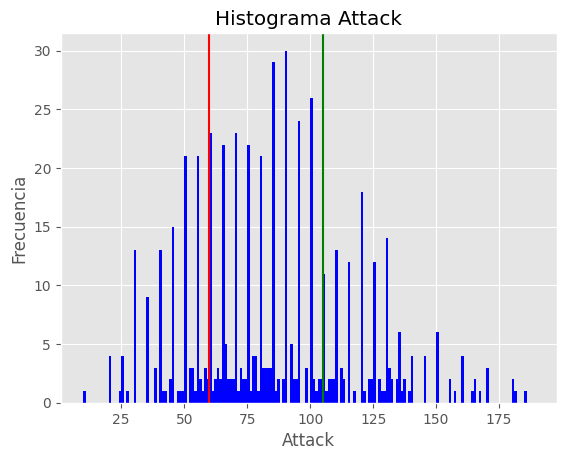

In [ ]:
# Grafico percentil 25 y 75 Attack
intervalos = range(int(nuevo['Attack'].min()), int(nuevo['Attack'].max()))
plt.hist(x=nuevo['Attack'], bins=intervalos, color='#0000FF')
plt.title('Histograma Attack')
plt.xlabel('Attack')
plt.ylabel('Frecuencia')
plt.axvline((nuevo['Attack'].quantile(0.25, interpolation='lower')), color='red')
plt.axvline((nuevo['Attack'].quantile(0.75, interpolation='lower')), color='green')
plt.show()

**Percentil Special Attack con los nuevos datos**

In [ ]:
# Percentiles Attack
percentiles = [i/100 for i in range (0, 101)]
nuevo['Sp. Atk'].quantile(percentiles, interpolation='lower')

0.00     10
0.01     20
0.02     25
0.03     30
0.04     30
       ... 
0.96    145
0.97    150
0.98    154
0.99    165
1.00    180
Name: Sp. Atk, Length: 101, dtype: int64

In [ ]:
# Deciles Attack
deciles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1]
nuevo['Sp. Atk'].quantile(deciles, interpolation='lower')

0.1     40
0.2     48
0.3     55
0.4     65
0.5     72
0.6     85
0.7     95
0.8    105
0.9    125
1.0    180
Name: Sp. Atk, dtype: int64

In [ ]:
# Cuartiles Attack
cuartiles = [0, 0.25, 0.5, 0.75, 1]
nuevo['Sp. Atk'].quantile(cuartiles, interpolation='lower')

0.00     10
0.25     50
0.50     72
0.75    100
1.00    180
Name: Sp. Atk, dtype: int64

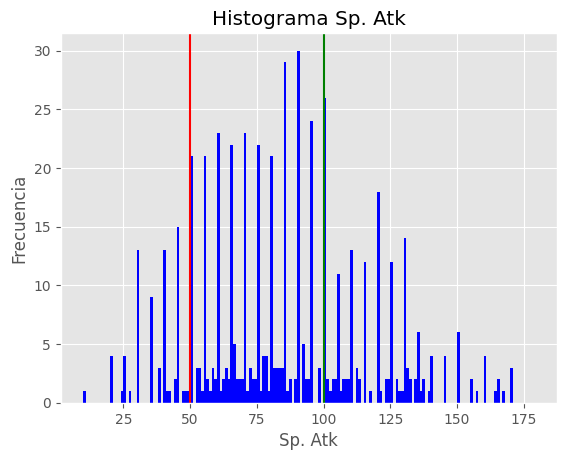

In [ ]:
# Grafico percentil 25 y 75 Attack
intervalos = range(int(nuevo['Sp. Atk'].min()), int(nuevo['Sp. Atk'].max()))
plt.hist(x=nuevo['Attack'], bins=intervalos, color='#0000FF')
plt.title('Histograma Sp. Atk')
plt.xlabel('Sp. Atk')
plt.ylabel('Frecuencia')
plt.axvline((nuevo['Sp. Atk'].quantile(0.25, interpolation='lower')), color='red')
plt.axvline((nuevo['Sp. Atk'].quantile(0.75, interpolation='lower')), color='green')
plt.show()

# Análisis Bivariado

**Hipótesis**

En los videojuegos de Pokemon, se podría hipotetizar que existe una correlación positiva entre las estadísticas de Ataque y Ataque Especial, lo que significa que a medida que el Ataque aumenta, el Ataque Especial también tiende a aumentar. Esto podría indicar que los Pokemon que son físicamente fuertes también tienden a ser fuertes en ataques especiales.

In [ ]:
#Quitamos los valores null
nuevo = datos.dropna(how='any')
nuevo.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000
mean,454.467714,462.762653,71.921466,85.151832,80.338569,77.890052,76.099476,71.376963,4.144852
std,267.908438,118.089643,23.925199,33.111166,31.872954,33.579570,27.380424,29.543395,2.275200
min,1.000000,185.000000,1.000000,10.000000,15.000000,10.000000,20.000000,5.000000,1.000000
25%,215.000000,370.000000,55.000000,60.000000,58.000000,50.000000,55.000000,50.000000,2.000000
50%,454.000000,481.000000,70.000000,84.000000,77.000000,72.000000,75.000000,70.000000,4.000000
75%,698.000000,530.000000,89.000000,105.000000,100.000000,100.000000,95.000000,95.000000,6.000000
max,905.000000,780.000000,223.000000,190.000000,230.000000,180.000000,230.000000,160.000000,8.000000


In [ ]:
# Conjunto de variasbles attack y sp. attack sin valores null
ab = nuevo.loc[: ,['Attack', 'Sp. Atk']]  #nuevo o datos (da valores diferentes)
ab

,Attack,Sp. Atk
0,49,65
1,62,80
2,82,100
3,100,122
6,84,109
...,...,...
1053,112,80
1054,130,40
1055,115,65
1056,115,135


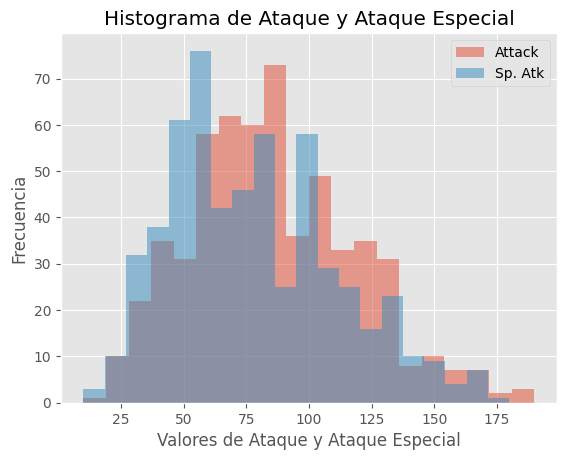

In [ ]:
#Histograma
plt.hist(ab['Attack'], bins=20, alpha=0.5, label='Attack')
plt.hist(ab['Sp. Atk'], bins=20, alpha=0.5, label='Sp. Atk')
plt.xlabel('Valores de Ataque y Ataque Especial')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.title('Histograma de Ataque y Ataque Especial')
plt.show()

**Correlación**

In [ ]:
#Correlación
ab.corr(method='pearson')

,Attack,Sp. Atk
Attack,1.000000,0.353432
Sp. Atk,0.353432,1.000000


Con el método Pearson, el valor de la correlación es 0.353432, cabe destacar que se quitaron los datos null del dataset para calcular este valor.

Correlación = 0.353432

Es una correlación positiva, por lo tanto, ambas variables se relacionan y crecen juntas de manera lineal.

**Varianza, Media y Covarianza**

In [ ]:
ds_attack = (ab.groupby("Attack").agg(frequency=("Attack", "count")))

ds_SpAtk = (ab.groupby("Sp. Atk").agg(frequency=("Sp. Atk", "count")))

varianza_attack = ds_attack["frequency"].var()
varianza_SpAtk = ds_SpAtk["frequency"].var()
media_attack = ds_attack["frequency"].mean()
media_SpAtk = ds_SpAtk["frequency"].mean()


In [ ]:
print("Varianza Attack:", round(varianza_attack, 3))
print("Desviación estándar Attack:", round(math.sqrt(varianza_attack), 3))
print("Media Attack:", round(media_attack, 3))

Varianza Attack: 52.558
Desviación estándar Attack: 7.25
Media Attack: 5.457


In [ ]:
print("Varianza Sp. Atk:", round(varianza_SpAtk, 3))
print("Desviación estándar Sp. Atk:", round(math.sqrt(varianza_SpAtk), 3))
print("Media Sp. Atk:", round(media_SpAtk, 3))

Varianza Sp. Atk: 60.042
Desviación estándar Sp. Atk: 7.749
Media Sp. Atk: 5.673


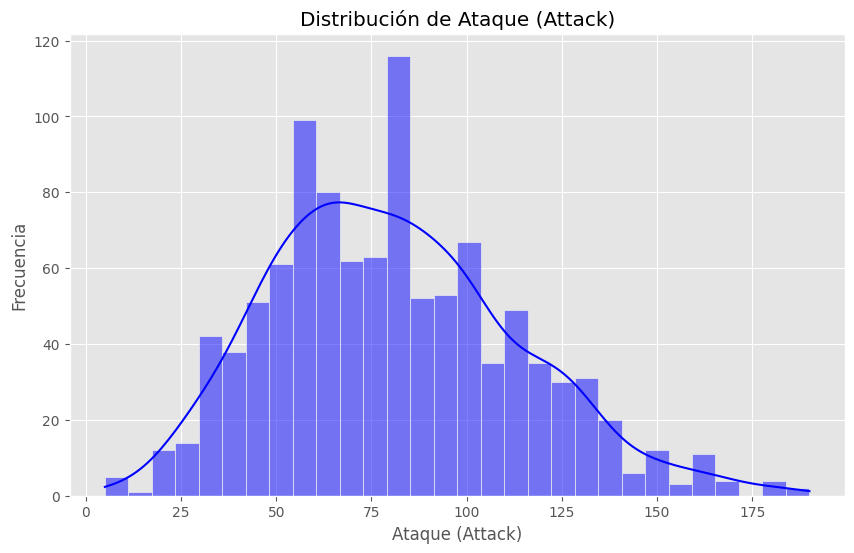

In [ ]:
# Crear un gráfico de distribución para Ataque (Attack)
atk_data = datos["Attack"]

plt.figure(figsize=(10, 6))
sns.histplot(atk_data, kde=True, color='blue', bins=30)
plt.xlabel('Ataque (Attack)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Ataque (Attack)')

# Mostrar el gráfico
plt.show()

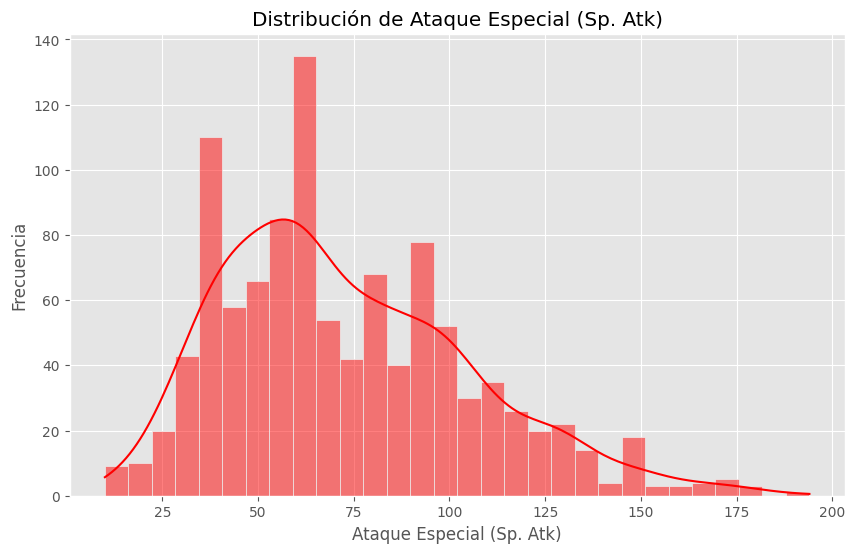

In [ ]:
# Crear un gráfico de distribución para Ataque Especial (Sp. Atk)
sp_atk_data = datos["Sp. Atk"]

plt.figure(figsize=(10, 6))
sns.histplot(sp_atk_data, kde=True, color='red', bins=30)
plt.xlabel('Ataque Especial (Sp. Atk)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Ataque Especial (Sp. Atk)')

# Mostrar el gráfico
plt.show()

In [ ]:
#Covarianza
cov_pk = nuevo.cov()
cov_pk

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,71774.931211,5571.612953,1060.687145,1295.701589,824.701510,1117.075989,759.752343,507.054150,602.447867,22.516415
Total,5571.612953,13945.163847,1900.026782,2926.315820,2201.085744,2871.220362,2205.665260,1841.785432,34.275699,21.345391
HP,1060.687145,1900.026782,572.415150,408.831875,200.573838,348.660931,216.088246,153.851335,7.450207,3.059111
Attack,1295.701589,2926.315820,408.831875,1096.349284,443.048155,392.966024,219.584520,365.909448,8.369577,4.338749
Defense,824.701510,2201.085744,200.573838,443.048155,1015.885171,174.285542,443.558919,-76.201278,4.309264,2.471933
Sp. Atk,1117.075989,2871.220362,348.660931,392.966024,174.285542,1127.587541,440.075642,388.350959,6.949520,5.092895
Sp. Def,759.752343,2205.665260,216.088246,219.584520,443.558919,440.075642,749.687640,136.652995,4.326475,3.119998
Speed,507.054150,1841.785432,153.851335,365.909448,-76.201278,388.350959,136.652995,872.812196,2.810685,3.260673
Generation,602.447867,34.275699,7.450207,8.369577,4.309264,6.949520,4.326475,2.810685,5.176534,0.152589
Legendary,22.516415,21.345391,3.059111,4.338749,2.471933,5.092895,3.119998,3.260673,0.152589,0.112663


In [ ]:
#Covarianza de Attack y Sp. Atk
round(cov_pk.loc["Attack", "Sp. Atk"], 3)

392.966

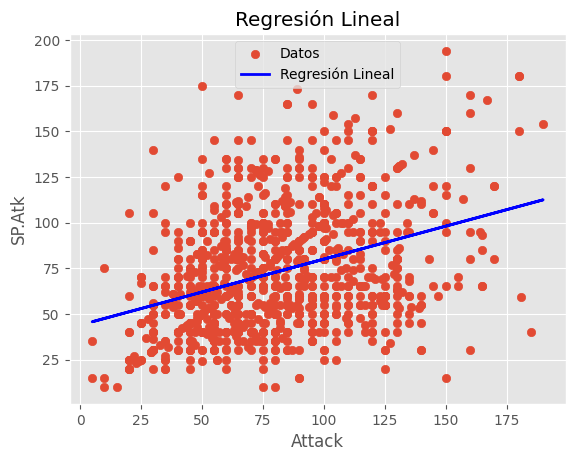

In [ ]:
# Extrae las columnas que deseas usar para la regresión lineal
X = datos["Attack"].values.reshape(-1, 1)  # Variable independiente (Attack)
y = datos["Sp. Atk"].values  # Variable dependiente (SP.Atk)

# Crea el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Realiza predicciones con el modelo para obtener la línea de regresión
y_pred = modelo.predict(X)

# Grafica los puntos de datos
plt.scatter(X, y, label='Datos')

# Grafica la línea de regresión
plt.plot(X, y_pred, color='Blue', linewidth=2, label='Regresión Lineal')

plt.xlabel('Attack')
plt.ylabel('SP.Atk')
plt.title('Regresión Lineal')
plt.legend()
plt.show()

**Conclusión**

La correlación indica que, en promedio, los Pokemon con un alto nivel de Ataque, tienden a tener un alto nivel de Ataque Especial. Esto podría indicar que las estadísticas de Ataque y Ataque Especial están relacionadas en cierta medida.
Sin embargo, la correlación al ser baja, también sugiere que hay una considerable variabilidad en los datos. Es decir, no todos los Pokemon siguen esta tendencia de manera estricta; hay excepciones.

# Análisis Multivariado

Hipótesis: "En los juegos de pokemon uno puede suponer que entre más Ataque tenga un pokémon, menos defensivas serán el resto de sus estadísticas"

Variables a analizar:

*   Attack
*   Hp
*   Defense
*   Sp. Def





In [ ]:
#tabla con los datos a utilizar en el analisis

multi= nuevo.loc[:,['Attack','HP','Defense','Sp. Def']]
df=multi.rename(columns={'Sp. Def':'SpDef'})
df

,Attack,HP,Defense,SpDef
0,49,45,49,65
1,62,60,63,80
2,82,80,83,100
3,100,80,123,120
6,84,78,78,85
...,...,...,...,...
1053,112,120,65,75
1054,130,80,60,80
1055,115,85,95,65
1056,115,74,70,80


Correlación de las variables

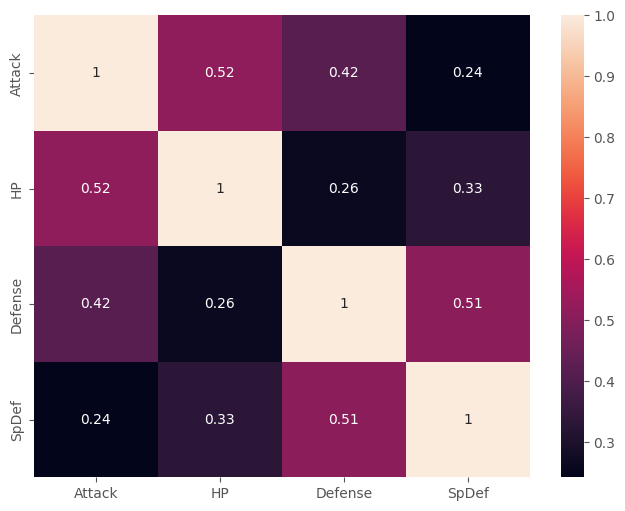

In [ ]:
corr=df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True)
plt.show()

Del análisis anterior podemos ver que entre las estadísticas consideradas el ataque está menos relacionado con la defensa especial y con la vida.

In [ ]:
#Evaluacion del modelo de regresion lineal multiple

lm = smf.ols(formula="Attack~HP+Defense+SpDef", data=df).fit()
lm.pvalues #bajo 0.05, se aprueba la hipotesis

Intercept    1.013415e-05
HP           1.960400e-32
Defense      3.552450e-17
SpDef        4.435647e-02
dtype: float64

Considerando que el valor de p de todas las variables es menor a 0,05 significa que hay evidencia suficiente para sugerir que las variables independientes(HP, Defense y Sp. Def) tiene un efecto significativo en la variable dependiente(Attack).

In [ ]:
#resumen de los resultados de la regresión
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Attack   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     105.6
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           2.38e-54
Time:                        15:27:18   Log-Likelihood:                -2691.2
No. Observations:                 573   AIC:                             5390.
Df Residuals:                     569   BIC:                             5408.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.9940      4.264      4.454      0.0

Ahora vemos el gráfico correspondiente a la regresión lineal.

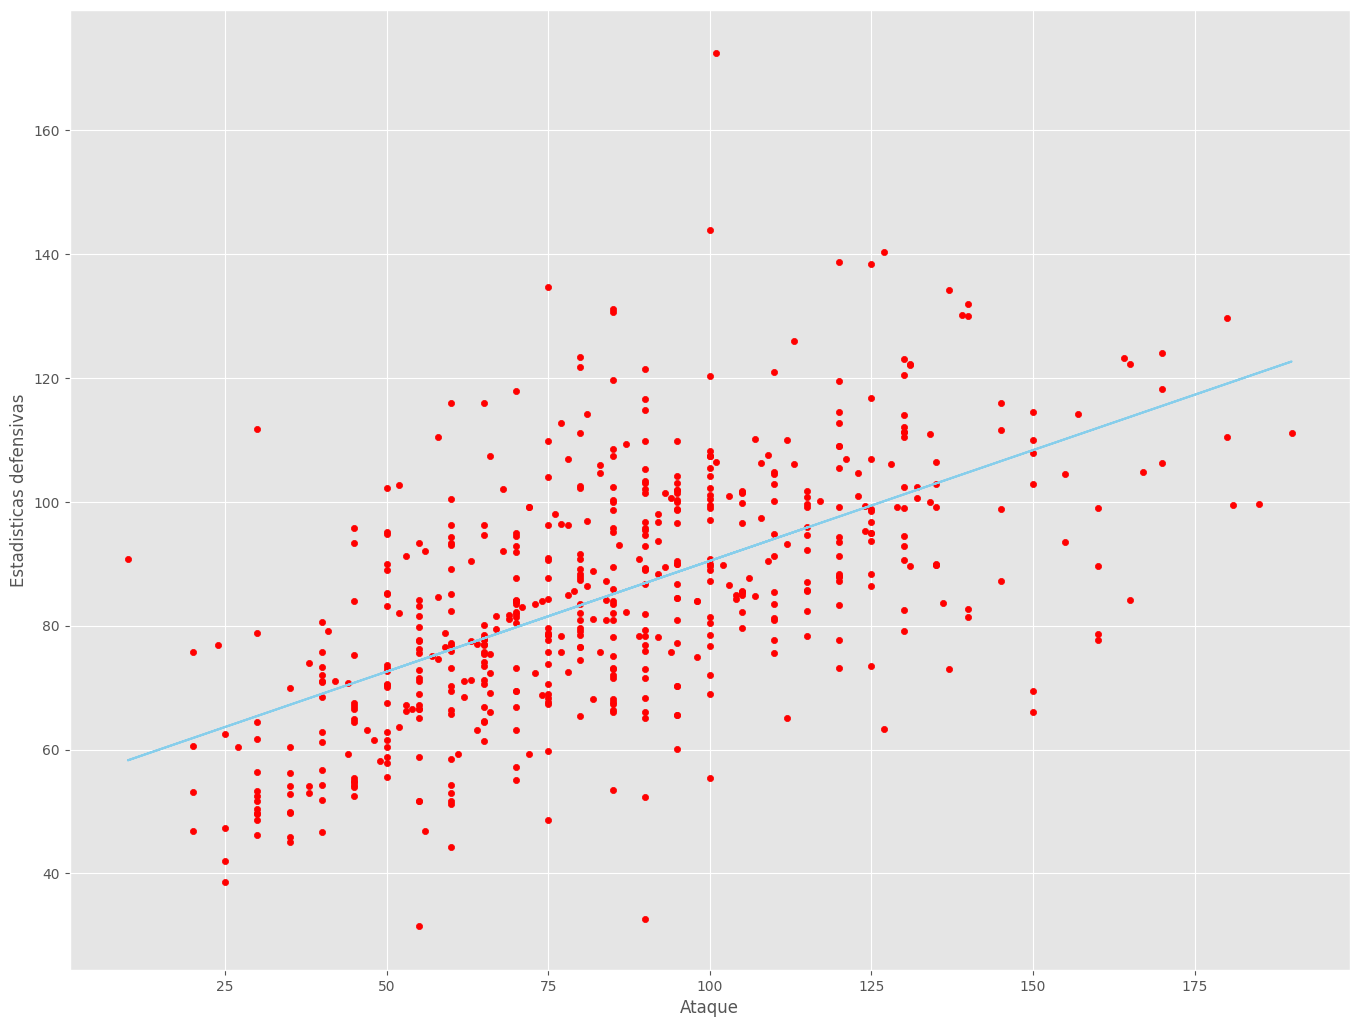

In [ ]:
predict= lm.predict(df[["HP","Defense","SpDef"]]) #prediccion final con los datos
multi["predict"] = predict#se agrega la prediccion al dataframe

x = multi["Attack"] #Todos los valores de la variable Attack
y = multi["predict"] # Todos los valores de la variable predict estimando ldel Ataque

a, b = np.polyfit(x, y, 1)
r = np.corrcoef(x, y)

plt.subplot(111)
plt.scatter(x,y, color="r", s=20)#puntos
plt.xlabel("Ataque")
plt.ylabel("Estadisticas defensivas")
plt.plot(x, a * x + b, color="skyblue")#linea
plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=2, wspace=0.2, hspace=0.2) #ajusta el tamanio de visualizacion del grafico
plt.show()

<h1>Conclusión</h1>

Considerando que la correlacion vista anteriormente es positiva podemos decir que los datos están refutando la hipótesis inicial, dicho de otro modo, en general entre más ataque tenga el pokemon mas estadísticas defensivas tendrá.